# Задание 1

In [48]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [49]:
df = pd.DataFrame({'Experiment' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'Diameter' : [0.3, 0.6, 0.9, 0.3, 0.6, 0.9, 0.3, 0.6, 0.9],
                   'Slope' : [0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.05, 0.05, 0.05],
                   'Flow' : [0.04, 0.24, 0.69, 0.13, 0.82, 2.38, 0.31, 1.95, 5.66]})
df

,Experiment,Diameter,Slope,Flow
0,1,0.3,0.001,0.04
1,2,0.6,0.001,0.24
2,3,0.9,0.001,0.69
3,4,0.3,0.010,0.13
4,5,0.6,0.010,0.82
5,6,0.9,0.010,2.38
6,7,0.3,0.050,0.31
7,8,0.6,0.050,1.95
8,9,0.9,0.050,5.66


In [50]:
log_D = np.log(df['Diameter'])
log_S = np.log(df['Slope'])
log_Q = np.log(df['Flow'])

In [51]:
X = np.column_stack((np.ones(len(log_D)), log_D, log_S))
X

array([[ 1.        , -1.2039728 , -6.90775528],
       [ 1.        , -0.51082562, -6.90775528],
       [ 1.        , -0.10536052, -6.90775528],
       [ 1.        , -1.2039728 , -4.60517019],
       [ 1.        , -0.51082562, -4.60517019],
       [ 1.        , -0.10536052, -4.60517019],
       [ 1.        , -1.2039728 , -2.99573227],
       [ 1.        , -0.51082562, -2.99573227],
       [ 1.        , -0.10536052, -2.99573227]])

In [52]:
beta, _, _, _ = np.linalg.lstsq(X, log_Q, rcond = None)
beta

array([3.5940558 , 2.62793694, 0.53198742])

In [53]:
alpha1 = beta[1]
alpha2 = beta[2]
alpha3 = np.exp(beta[0])

print(alpha1, alpha2, alpha3)

2.627936938205161 0.5319874213188246 36.38133234249821


# Задание 2

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def f(x):
    return x ** 5 - 2 * x ** 4

In [57]:
def f_first_deriv(x):
    return 5 * x ** 4 - 8 * x ** 3

In [58]:
def f_second_deriv(x):
    return 20 * x ** 3 - 24 * x ** 2

In [59]:
a = 0.2
b = 0.6
h_vals = np.logspace(-1, -10, num = 100)

In [60]:
f_first_deriv_exact = f_first_deriv(x_exact)
f_second_deriv_exact = f_second_deriv(x_exact)

In [61]:
f_first_deriv_error = []
f_second_deriv_error = []

for h in h_vals:
    x_forward = x_exact + h
    x_backward = x_exact - h
    f_first_deriv_approx = (f(x_forward) - f(x_backward)) / (2 * h)
    f_first_deriv_error.append(np.abs(f_first_deriv_exact - f_first_deriv_approx))

    f_second_deriv_approx = (f(x_forward) - 2 * f(x_exact) + f(x_backward)) / h ** 2
    f_second_deriv_error.append(np.abs(f_second_deriv_exact - f_second_deriv_approx))

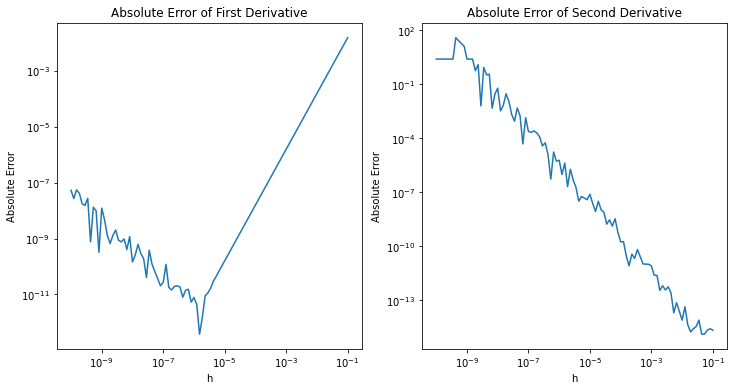

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.loglog(h_vals, f_first_deriv_error)
ax1.set_title('Absolute Error of First Derivative')
ax1.set_xlabel('h')
ax1.set_ylabel('Absolute Error')

ax2.loglog(h_vals, f_second_deriv_error)
ax2.set_title('Absolute Error of Second Derivative')
ax2.set_xlabel('h')
ax2.set_ylabel('Absolute Error')

plt.show()